In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import spiceypy as spice
import datetime

In [2]:
spice.furnsh("C:/Users/lcube/Desktop/arduino/planets/kernels/kernel.txt")
spice.tkvrsn("TOOLKIT")

'CSPICE_N0066'

In [14]:
steps = int(1e3)
now = datetime.datetime.now().isoformat()
etNow = spice.utc2et(now)

mult = 24*3600/12
mercury_times = np.linspace(etNow - 88*mult, etNow, steps)
venus_times = np.linspace(etNow - 225*mult, etNow, steps)
earth_times = np.linspace(etNow - 365*mult, etNow, steps)
mars_times = np.linspace(etNow - 687*mult, etNow, steps)
jupiter_times = np.linspace(etNow - 4333*mult, etNow, steps)
saturn_times = np.linspace(etNow - 10759*mult, etNow, steps)
uranus_times = np.linspace(etNow - 30689*mult, etNow, steps)
neptune_times = np.linspace(etNow - 60182*mult, etNow, steps)
pluto_times = np.linspace(etNow - 90560*mult, etNow, steps)

In [15]:
mercury_positions = spice.spkpos('MERCURY BARYCENTER', mercury_times, 'J2000', 'NONE', 'SUN')[0]
venus_positions = spice.spkpos('VENUS BARYCENTER', venus_times, 'J2000', 'NONE', 'SUN')[0]
earth_positions = spice.spkpos('EARTH BARYCENTER', earth_times, 'J2000', 'NONE', 'SUN')[0]
mars_positions = spice.spkpos('MARS BARYCENTER', mars_times, 'J2000', 'NONE', 'SUN')[0]
jupiter_positions = spice.spkpos('JUPITER BARYCENTER', jupiter_times, 'J2000', 'NONE', 'SUN')[0]
saturn_positions = spice.spkpos('SATURN BARYCENTER', saturn_times, 'J2000', 'NONE', 'SUN')[0]
uranus_positions = spice.spkpos('URANUS BARYCENTER', uranus_times, 'J2000', 'NONE', 'SUN')[0]
neptune_positions = spice.spkpos('NEPTUNE BARYCENTER', neptune_times, 'J2000', 'NONE', 'SUN')[0]
pluto_positions = spice.spkpos('PLUTO BARYCENTER', pluto_times, 'J2000', 'NONE', 'SUN')[0]

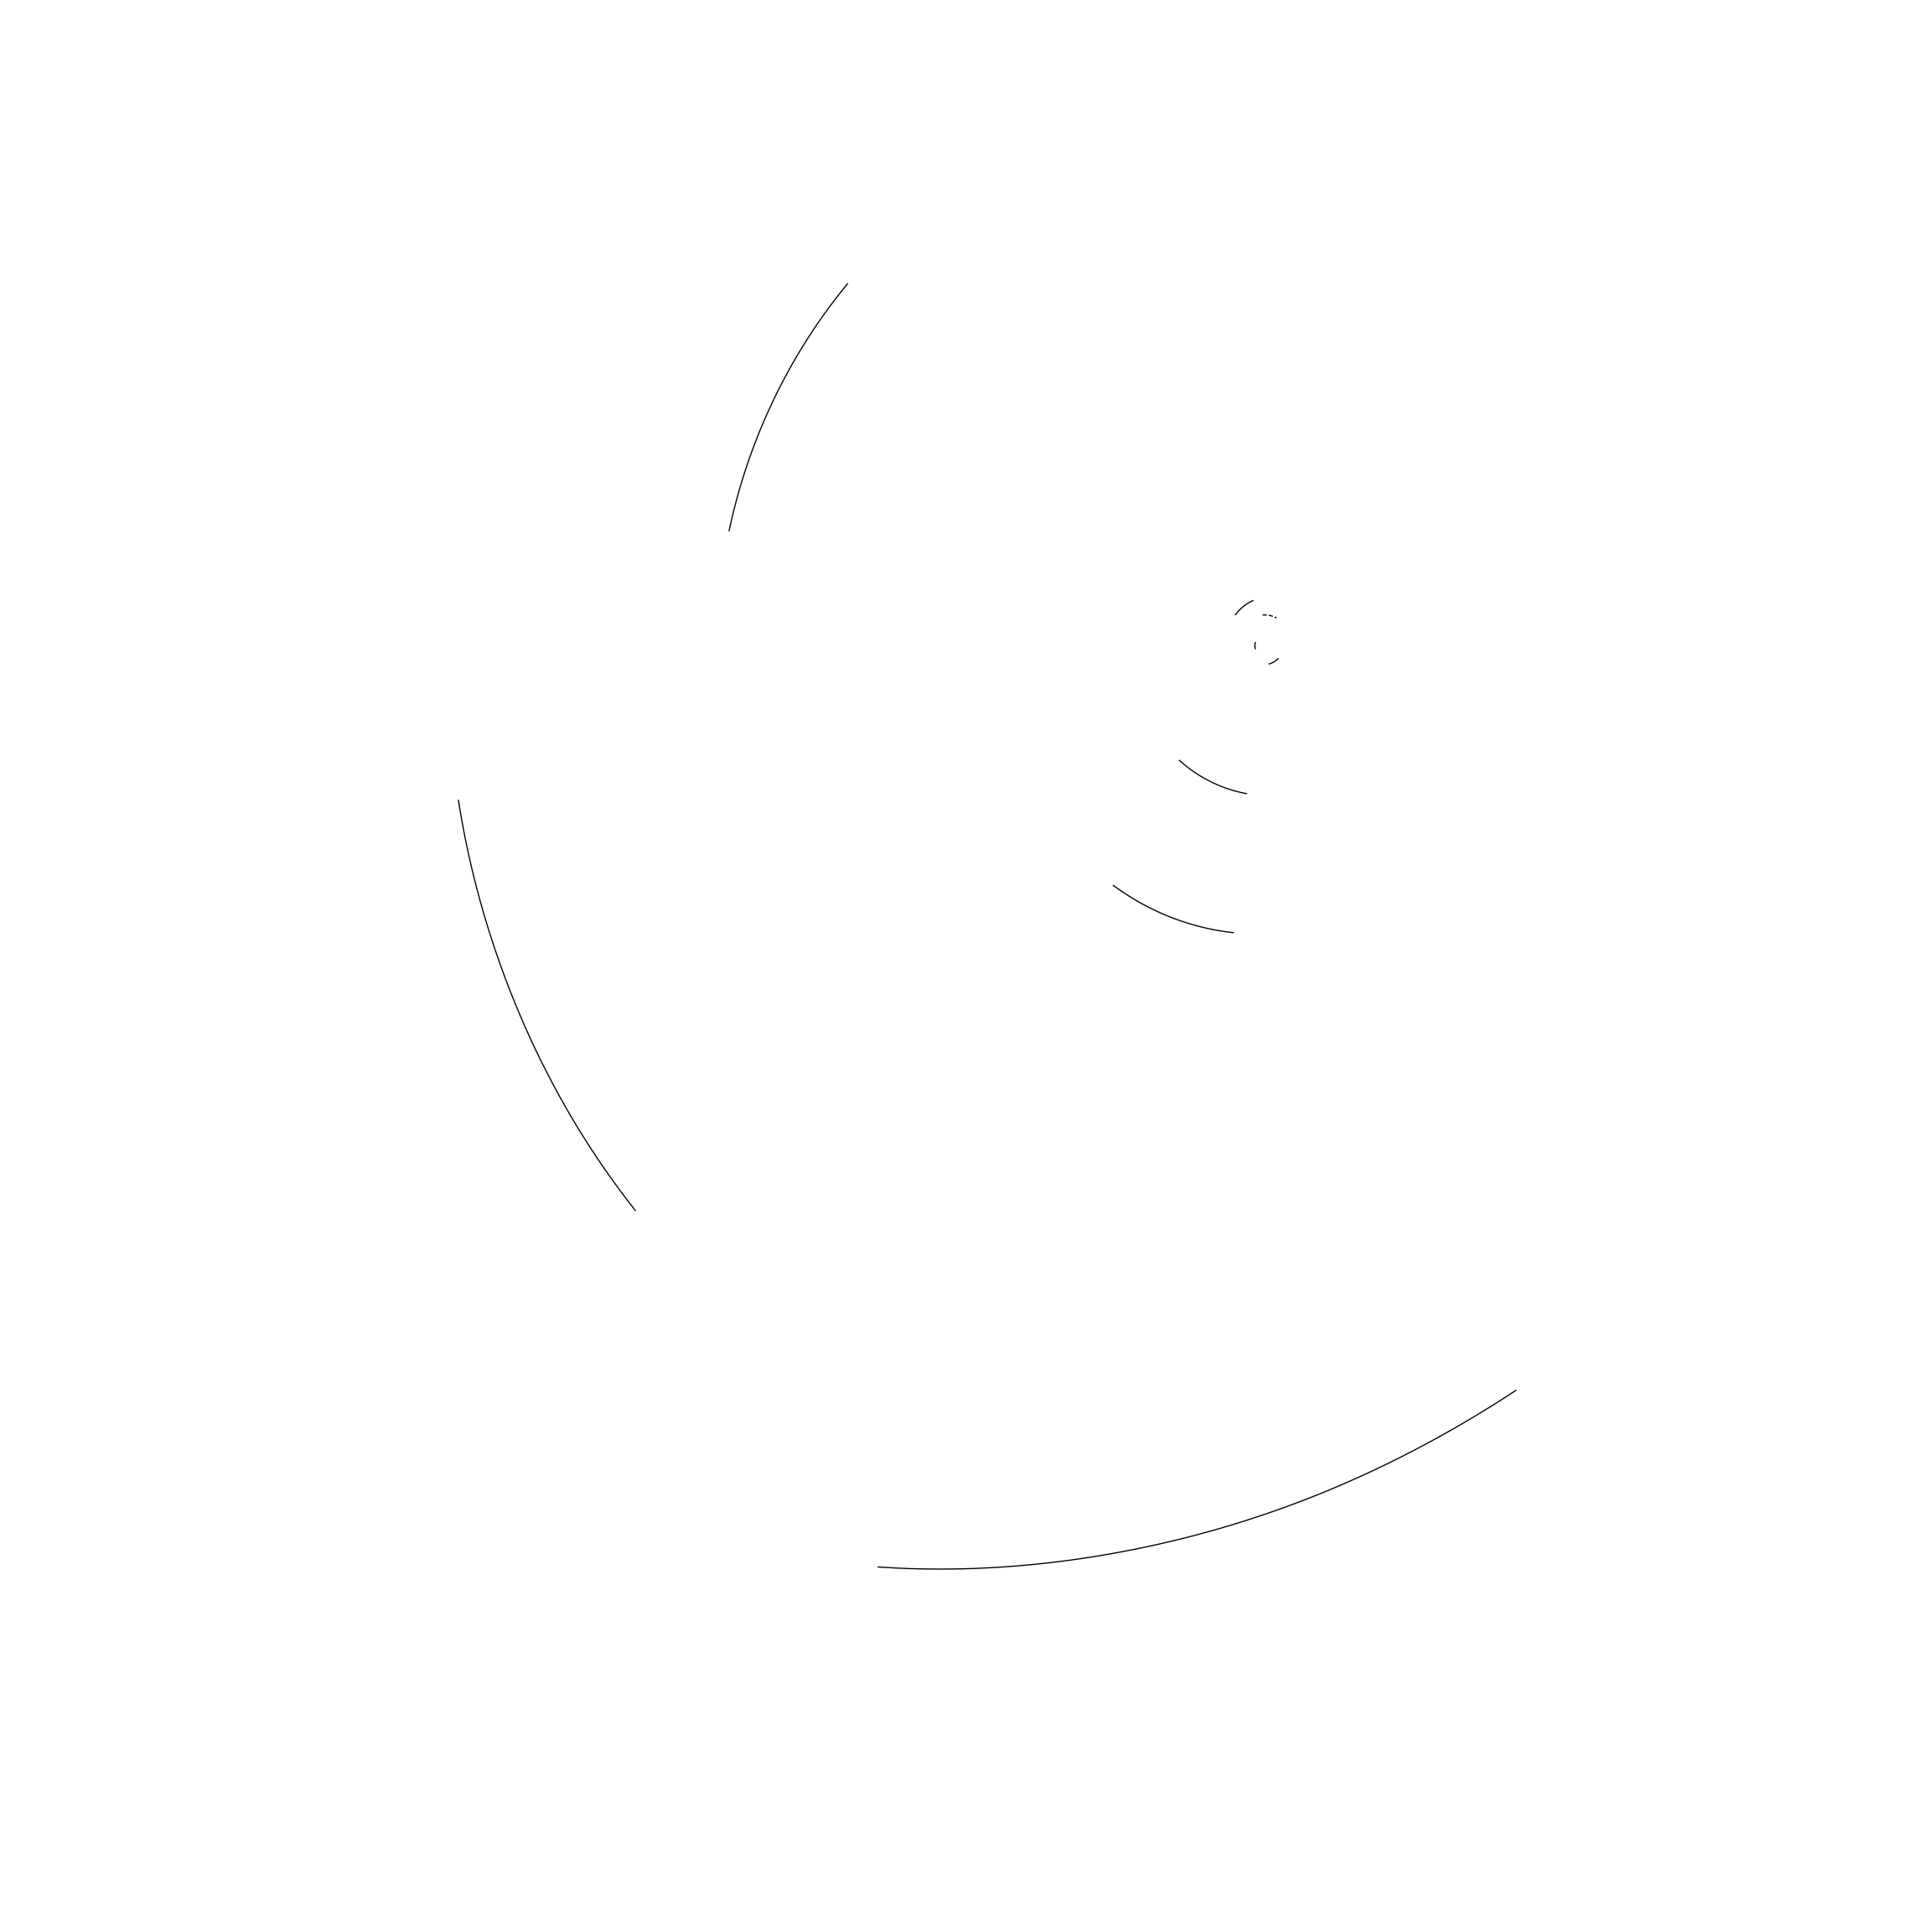

In [16]:
positions_list = [earth_positions.T, mercury_positions.T, venus_positions.T, mars_positions.T,
                  jupiter_positions.T, saturn_positions.T, uranus_positions.T, neptune_positions.T, pluto_positions.T]
names_list = ['earth', 'mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']

fig = plt.figure(figsize=(15,15), dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=-60, azim=90)
# ax.view_init(elev=0, azim=0)

# ax.scatter(0, 0, c='black', s=6**2, marker='x')
inner_only = 0
for count, (position, name) in enumerate(zip(positions_list, names_list)):
    if inner_only and count > 3: 
        break
    if count == 0:  ls = '--'
    else:           ls = '-'
    ax.plot(position[0], position[1], position[2], label=name, ls=ls, lw=0.5, c='k')
    ax.scatter(position[0,-1], position[1,-1], position[2,-1], s=0**2, c='k')
    
plt.axis('off')
plt.show()

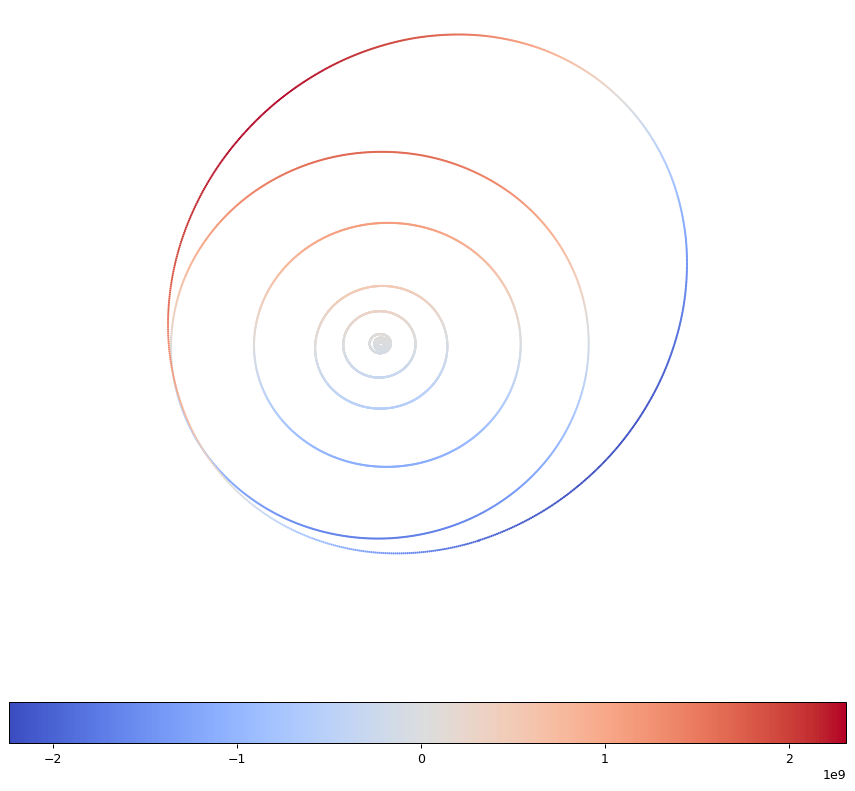

In [6]:
positions_list = np.array([earth_positions.T, mercury_positions.T, venus_positions.T, mars_positions.T,
                           jupiter_positions.T, saturn_positions.T, uranus_positions.T, neptune_positions.T, pluto_positions.T])
names_list = ['earth', 'mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']

plt.figure(figsize=(12,12), dpi=90)
inner_only = 0
for count, (position, name) in enumerate(zip(positions_list, names_list)):
    if inner_only and count > 3: 
        break
    ax = plt.scatter(position[0], position[1], c=position[2], s=0.5, 
                     cmap=plt.cm.coolwarm, vmin=np.min(positions_list[:,2]), vmax=np.max(positions_list[:,2]))
    
plt.colorbar(ax, orientation='horizontal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()